In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_column', None)

In [6]:
data=pd.read_csv("C:/Users/abidm/Desktop/pers/reg/salary_data_cleaned.csv")

In [7]:
df=data.copy()

In [8]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [9]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "machine learning" in title.lower():
        return "mle"
    elif "analyst" in title.lower():
        return "analyst"
    elif "director" in title.lower():
        return "director"
    elif "manager" in title.lower():
        return "manager"
    else:
        return "na"
    
def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "senior"
    elif "jr" in title.lower() or "jr." in title.lower():
        return "jr"
    else:
        return "na"
        

In [10]:
df['job_simp']=df['Job Title'].apply(title_simplifier)
df['seniority']=df['Job Title'].apply(seniority)
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['desc_len']=df['Job Description'].apply(lambda x : len(x))
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['num_comp']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [99]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


### Comments not seen yet

<AxesSubplot:>

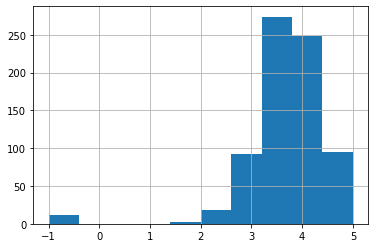

In [52]:
df.Rating.hist()

<AxesSubplot:>

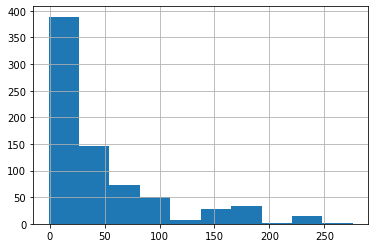

In [53]:
df.age.hist()

<AxesSubplot:>

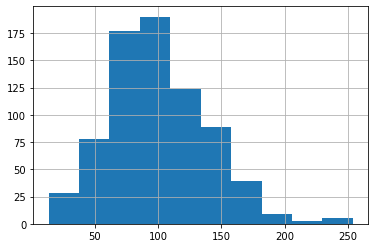

In [54]:
df.avg_salary.hist()

<AxesSubplot:>

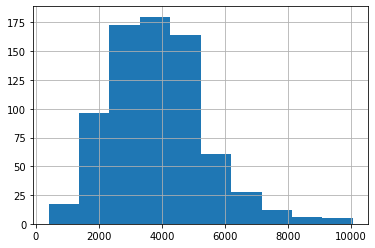

In [55]:
df.desc_len.hist()

<AxesSubplot:>

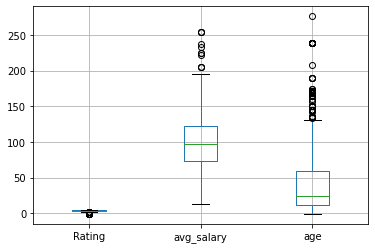

In [59]:
df.boxplot(column=['Rating','avg_salary','age'])

<AxesSubplot:>

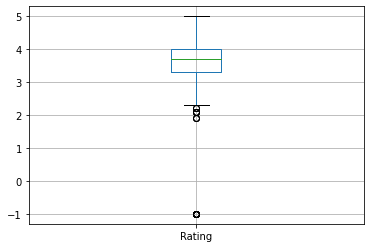

In [60]:
df.boxplot('Rating')

<AxesSubplot:>

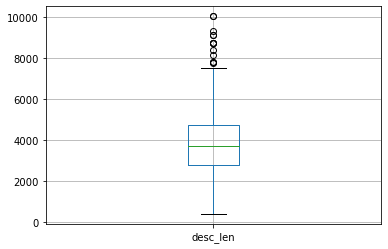

In [61]:
df.boxplot('desc_len')

<AxesSubplot:>

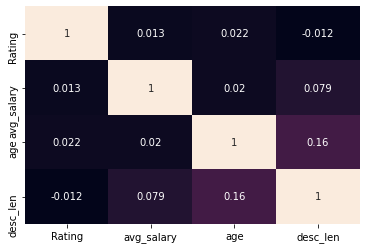

In [65]:
sns.heatmap(df[['Rating','avg_salary','age','desc_len']].corr(),annot=True,cbar=False)

In [101]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [100]:
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1,10,1,0,1,0,1,data scientist,na,3461,0


In [11]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]#num_comp,hourly,emploer lacked

column is Location and has 200 levels


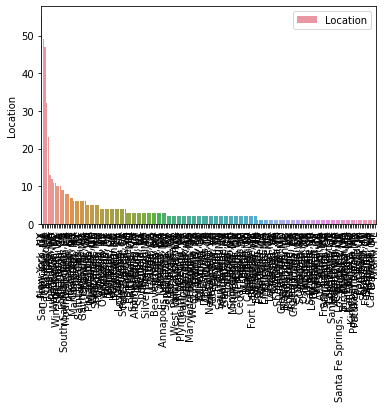

column is Headquarters and has 198 levels


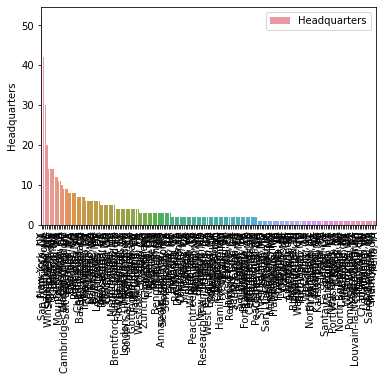

column is Size and has 9 levels


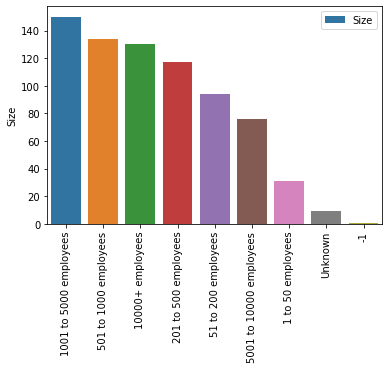

column is Type of ownership and has 11 levels


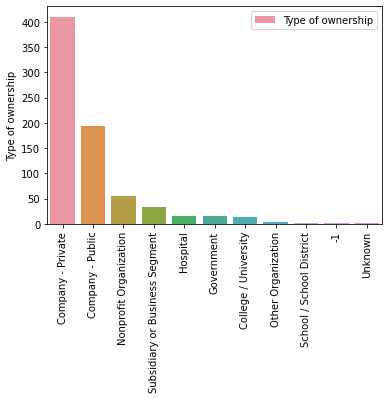

column is Industry and has 60 levels


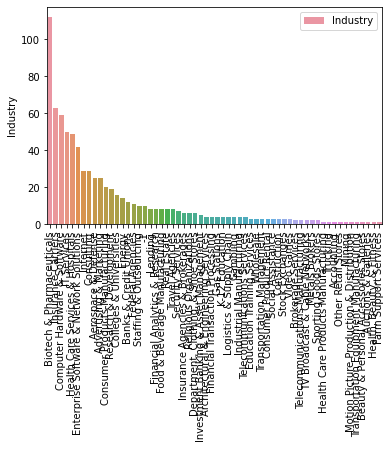

column is Sector and has 25 levels


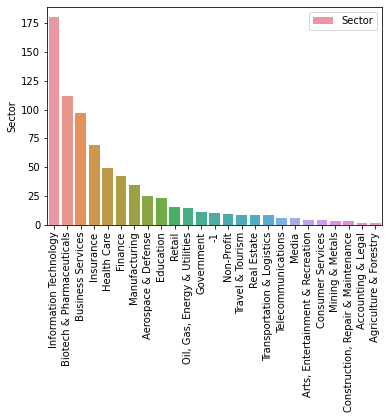

column is Revenue and has 14 levels


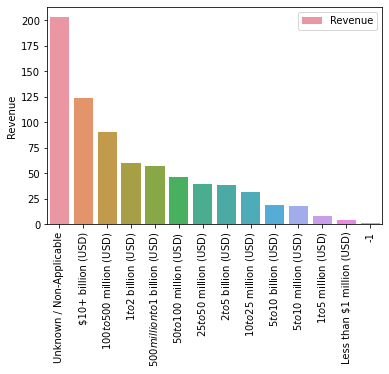

column is company_txt and has 343 levels


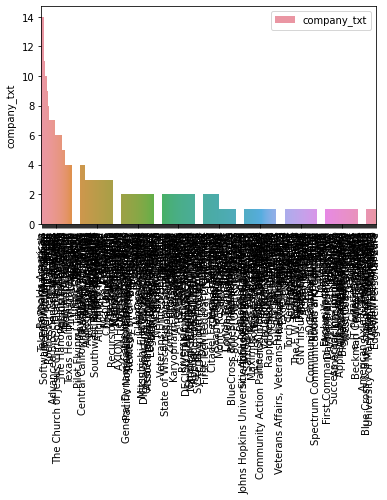

column is job_state and has 37 levels


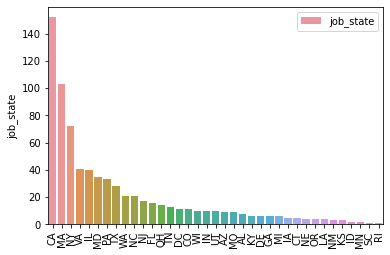

column is same_state and has 2 levels


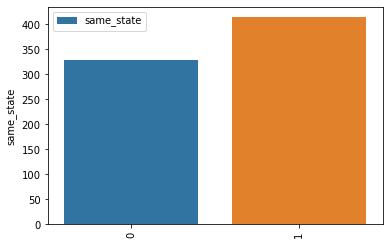

column is python_yn and has 2 levels


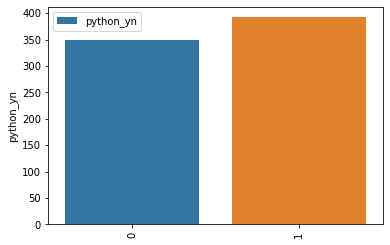

column is R_yn and has 2 levels


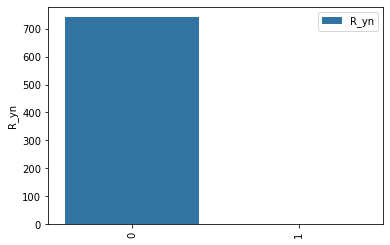

column is spark and has 2 levels


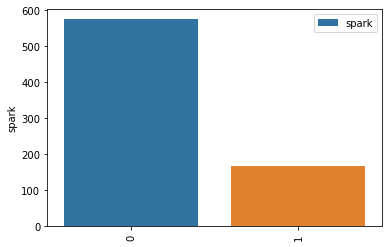

column is aws and has 2 levels


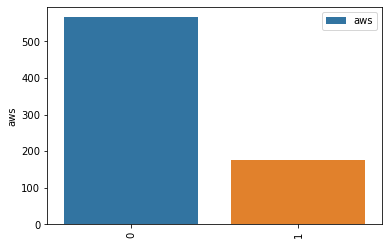

column is excel and has 2 levels


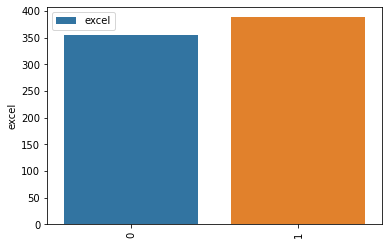

column is job_simp and has 7 levels


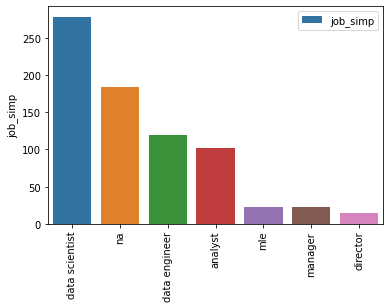

column is seniority and has 3 levels


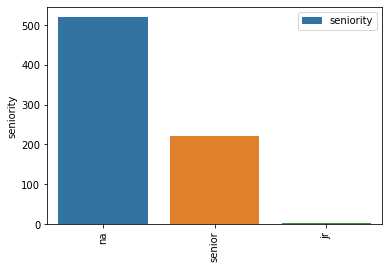

In [108]:
for i in df_cat.columns:
    cat_num=df[i].value_counts()
    print("column is {} and has {} levels".format(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num,label=i)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.legend()
    plt.show()

column Location has 200 levels


<ipython-input-15-0aa06e9a5361>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  chart.set_xticklabels(chart.get_xticklabels(),Rotation=90)


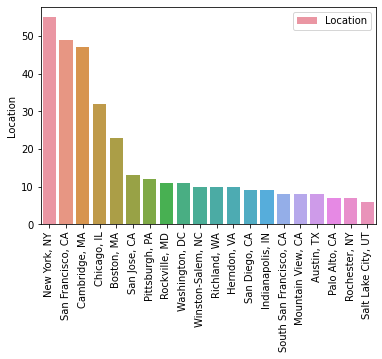

column Headquarters has 198 levels


<ipython-input-15-0aa06e9a5361>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  chart.set_xticklabels(chart.get_xticklabels(),Rotation=90)


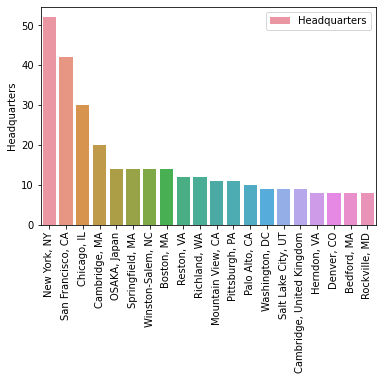

column company_txt has 343 levels


<ipython-input-15-0aa06e9a5361>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  chart.set_xticklabels(chart.get_xticklabels(),Rotation=90)


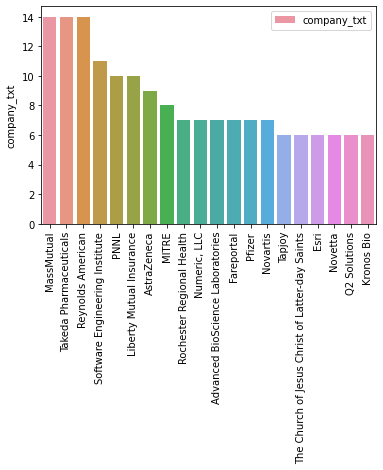

In [15]:
# (df.groupby(['Hematocrit','Influenza A'])[['Patient age quantile']].median())
for i in df[['Location','Headquarters','company_txt']]:
    lc=df[i].value_counts()[:20]
    print("column {} has {} levels".format(i,len(df[i].unique())))
    chart=sns.barplot(x=lc.index,y=lc,label=i)
    chart.set_xticklabels(chart.get_xticklabels(),Rotation=90)
    plt.legend()
    plt.show()

<ipython-input-27-7853c7d31ff2>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  chart.set_xticklabels(chart.get_xticklabels(),Rotation=90)


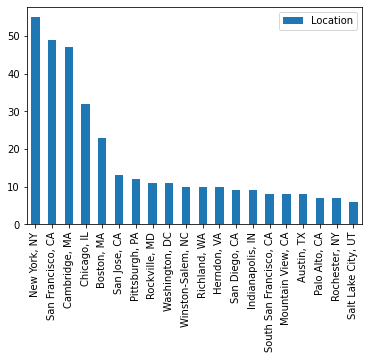

In [27]:
#othr alternative
lc=df['Location'].value_counts()[:20]
chart=lc.plot.bar()
chart.set_xticklabels(chart.get_xticklabels(),Rotation=90)
plt.legend()
plt.show()

<AxesSubplot:xlabel='job_simp'>

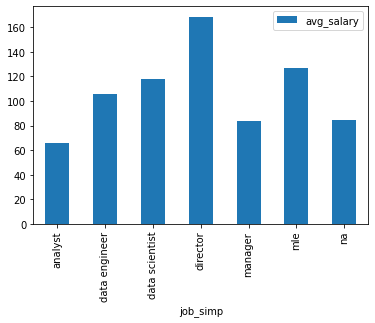

In [30]:
(df.groupby(['job_simp'])[['avg_salary']].mean()).plot.bar()

In [32]:
pd.pivot_table(df,index=['job_simp','seniority'],values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [50]:
display((df.groupby(['job_state','job_simp'])[['avg_salary']].mean()).head(12))
(df.groupby(['job_state','job_simp'])[['avg_salary']].mean()).columns#.sort_values('job_state',ascending=False).head(22)

avg_salary
job_state job_simp                  
AL        analyst          62.200000
          data engineer    65.000000
          na               43.750000
AZ        analyst          55.000000
          data engineer    79.500000
          data scientist   69.500000
          na              124.500000
CA        analyst          85.250000
          data engineer   129.540000
          data scientist  142.522059
          manager          80.611111
          mle             177.300000

Index(['avg_salary'], dtype='object')

In [69]:
# pd.options.display.max_rows
# pd.set_option('display.max_rows',None)
# pd.reset_option('display.max_rows')

In [70]:
df.groupby(['job_state','job_simp'])[['avg_salary']].mean().sort_values(['job_state','avg_salary'],ascending=False)

avg_salary
job_state job_simp                  
WI        data scientist  113.500000
          analyst          58.833333
          na               54.000000
WA        data scientist   99.764706
          na               97.500000
...                              ...
AZ        data scientist   69.500000
          analyst          55.000000
AL        data engineer    65.000000
          analyst          62.200000
          na               43.750000

[114 rows x 1 columns]

In [71]:
df.groupby(['job_state','job_simp'])[['avg_salary']].count().sort_values('job_state',ascending=False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
...                              ...
AZ        analyst                  1
          na                       2
AL        na                       2
          data engineer            1
          analyst                  5

[114 rows x 1 columns]

In [76]:
df[df['job_simp']=='data scientist'].groupby(['job_state'])[['avg_salary']].mean().sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [84]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [87]:
for i in df_pivots:
    if i=='avg_salary':
        continue
    else:
        print(i)
        display(df_pivots.groupby([i])[['avg_salary']].mean().sort_values('avg_salary',ascending=False))

Rating


,avg_salary
Rating,
-1.0,136.181818
5.0,134.700000
2.5,120.000000
4.5,117.714286
4.1,116.368421
3.9,113.071429
2.6,109.083333
4.4,108.606061
3.2,105.500000


Industry


,avg_salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


Sector


,avg_salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,111.767857
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333


Revenue


,avg_salary
Revenue,
$5 to $10 million (USD),126.111111
$1 to $5 million (USD),119.312500
-1,117.500000
$10+ billion (USD),115.165323
Less than $1 million (USD),108.625000
$1 to $2 billion (USD),104.533333
Unknown / Non-Applicable,104.310345
$50 to $100 million (USD),100.565217
$10 to $25 million (USD),100.359375


num_comp


,avg_salary
num_comp,
2,106.865854
1,106.208333
3,105.504386
0,97.602174
4,56.500000


hourly


,avg_salary
hourly,
0,103.1539
1,25.0000


employer_provided


,avg_salary
employer_provided,
1,119.970588
0,100.172414


python_yn


,avg_salary
python_yn,
1,112.653061
0,87.155714


R_yn


,avg_salary
R_yn,
0,100.706757
1,70.750000


spark


,avg_salary
spark,
1,113.347305
0,96.931304


aws


,avg_salary
aws,
1,112.559659
0,96.915194


excel


,avg_salary
excel,
0,102.953390
1,98.502577


Type of ownership


,avg_salary
Type of ownership,
-1,117.500000
Company - Public,110.893782
Subsidiary or Business Segment,110.573529
College / University,107.615385
Company - Private,101.776829
Government,84.300000
School / School District,77.750000
Other Organization,77.500000
Nonprofit Organization,68.281818


In [88]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')


python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
